In [1]:
import pandas as pd
import numpy as np
from calibration_tools import *
%matplotlib notebook

In [7]:
means = pd.read_csv('data/hifi_star_mean.csv')
detec = pd.read_csv('data/hifi_star_detections.csv')


In [3]:
calc = Mean_mag(detec,correction=0,sigma=3)
calc_corr = Mean_mag(detec,correction=0.015,sigma=3)

<IPython.core.display.Javascript object>


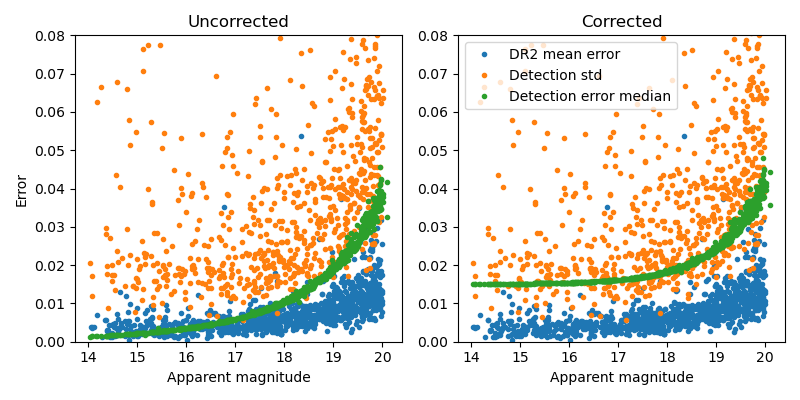

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('Uncorrected')
plt.plot(means.gMeanPSFMag,means.gMeanPSFMagErr,'.')
plt.plot(calc.gMeanPSFMag,calc.gStdPSFMag,'.')
plt.plot(calc.gMeanPSFMag,calc.gMedianPSFMagErr,'.')
plt.ylim(0,.08)
plt.ylabel('Error')
plt.xlabel('Apparent magnitude')
plt.subplot(122)
plt.title('Corrected')
plt.plot(means.gMeanPSFMag,means.gMeanPSFMagErr,'.',label='DR2 mean error')
plt.plot(calc_corr.gMeanPSFMag,calc_corr.gStdPSFMag,'.',label='Detection std')
plt.plot(calc_corr.gMeanPSFMag,calc_corr.gMedianPSFMagErr,'.',label='Detection error median')
plt.ylim(0,.08)
plt.xlabel('Apparent magnitude')
plt.legend()
plt.tight_layout()
plt.savefig('figs/psf_error_comparison.pdf')

<IPython.core.display.Javascript object>


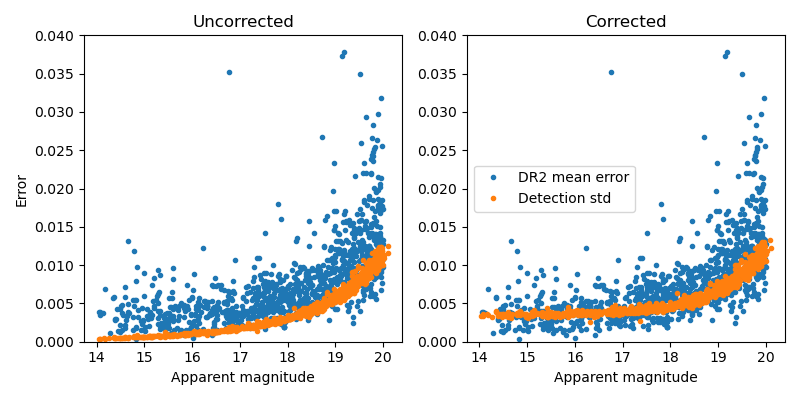

In [10]:
# averaged plot
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('Uncorrected')
plt.plot(means.gMeanPSFMag,means.gMeanPSFMagErr,'.')
plt.plot(calc.gMeanPSFMag,calc.gStdPSFMag,'.')
#plt.plot(calc.gMeanPSFMag,calc.gMedianPSFMagErr,'.')
plt.ylim(0,.04)
plt.ylabel('Error')
plt.xlabel('Apparent magnitude')
plt.subplot(122)
plt.title('Corrected')
plt.plot(means.gMeanPSFMag,means.gMeanPSFMagErr,'.',label='DR2 mean error')
plt.plot(calc_corr.gMeanPSFMag,calc_corr.gStdPSFMag,'.',label='Detection std')
#plt.plot(calc_corr.gMeanPSFMag,calc_corr.gMedianPSFMagErr,'.',label='Detection error median')
plt.ylim(0,.04)
plt.xlabel('Apparent magnitude')
plt.legend()
plt.tight_layout()
plt.savefig('figs/psf_error_DR2_weighted.pdf')

<IPython.core.display.Javascript object>


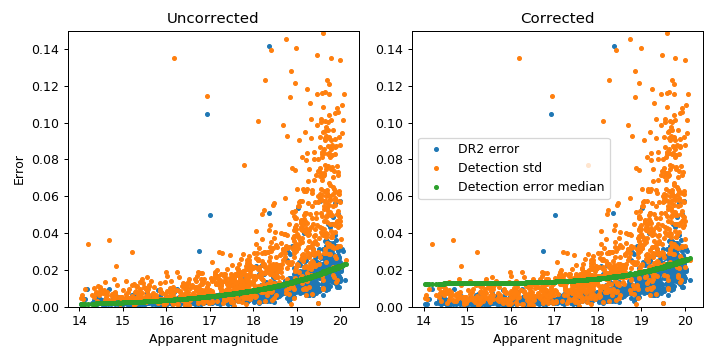

In [4]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('Uncorrected')
plt.plot(means.gMeanApMag,means.gMeanApMagErr,'.')
plt.plot(calc.gMeanApMag,calc.gStdApMag,'.')
plt.plot(calc.gMeanApMag,calc.gMedianApMagErr,'.')
plt.ylim(0,.15)
plt.ylabel('Error')
plt.xlabel('Apparent magnitude')
plt.subplot(122)
plt.title('Corrected')
plt.plot(means.gMeanApMag,means.gMeanApMagErr,'.',label='DR2 error')
plt.plot(calc_corr.gMeanApMag,calc_corr.gStdApMag,'.',label='Detection std')
plt.plot(calc_corr.gMeanApMag,calc_corr.gMedianApMagErr,'.',label='Detection error median')
plt.ylim(0,.15)
plt.xlabel('Apparent magnitude')
plt.legend()
plt.tight_layout()
plt.savefig('figs/ap_error_comparison.pdf')

<IPython.core.display.Javascript object>


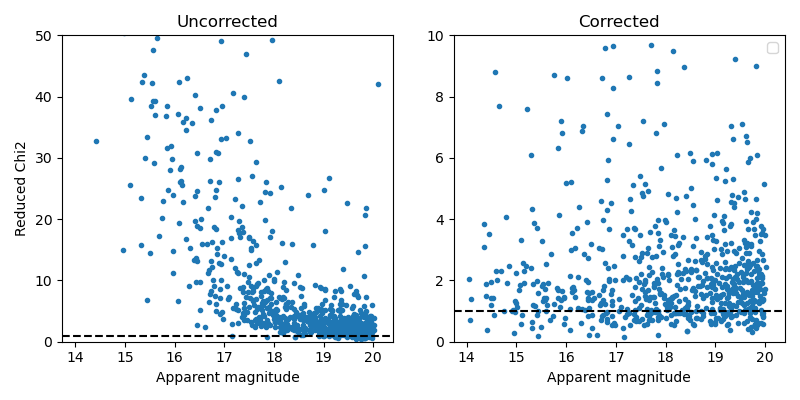

No handles with labels found to put in legend.


In [8]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('Uncorrected')
plt.plot(calc.gMeanPSFMag,calc.gPSFChi2,'.')
plt.axhline(1,ls='--',color='k')
plt.ylim(0,50)
plt.ylabel('Reduced Chi2')
plt.xlabel('Apparent magnitude')
plt.subplot(122)
plt.title('Corrected')
plt.plot(calc_corr.gMeanPSFMag,calc_corr.gPSFChi2,'.')
plt.axhline(1,ls='--',color='k')
plt.xlabel('Apparent magnitude')
plt.legend()
plt.tight_layout()
plt.ylim(0,10)
plt.savefig('figs/gchi2.pdf')

In [5]:
lcg = PS1_lc(calc.iloc[0,0],'g',detec,correction=False)
lcgc = PS1_lc(calc_corr.iloc[0,0],'g',detec,correction=True)

In [6]:
calcaverage = sigmacut.calcaverageclass()
calcaveragec = sigmacut.calcaverageclass()

In [7]:
calcaverage.calcaverage_sigmacutloop(lcg.psfMag,noise=lcg.psfMagErr,Nsigma=3.0,median_firstiteration=True,saveused=True)
calcaveragec.calcaverage_sigmacutloop(lcgc.psfMag,noise=lcgc.psfMagErr,Nsigma=3.0,median_firstiteration=True,saveused=True)

0

In [28]:
calcaverage.mean

14.390935917272712

In [8]:
ind = ~calcaverage.clipped
indc = ~calcaveragec.clipped

In [30]:
np.where(ind)

(array([ 0,  5,  6, 10, 11, 13]),)

<IPython.core.display.Javascript object>


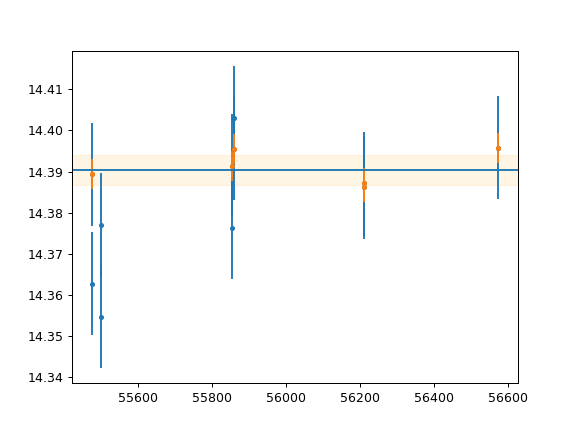

In [12]:
plt.figure()
#plt.errorbar(lcg.obstime,lcg.psfMag,yerr=lcg.psfMagErr,fmt='.')
plt.errorbar(lcgc.obstime.iloc[indc],lcgc.psfMag.iloc[indc],yerr=lcgc.psfMagErr.iloc[indc],fmt='.')
plt.errorbar(lcg.obstime.iloc[ind],lcg.psfMag.iloc[ind],yerr=lcg.psfMagErr.iloc[ind],fmt='.')

plt.axhline(np.nanmedian(lcg.psfMag.iloc[ind]))
med = np.nanmedian(lcg.psfMag.iloc[ind])
std = np.nanstd(lcg.psfMag.iloc[ind])
plt.axhspan(med-std,med+std,alpha=.1,color='orange')
#plt.errorbar(lcr.obstime,lcr.psfMag,yerr=lcr.psfMagErr,fmt='.')

# Fit the offset

In [3]:
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [8]:
%matplotlib inline
def Correction_factor(cor,table,bp,sigma):
    print(cor[0])
    cor = cor[0]
    calc_cor = Mean_mag(table,sigma=sigma,correction=cor)
    residual = np.nansum(abs(calc_cor[bp + 'StdPSFMag'].values - calc_cor[bp + 'MedianPSFMagErr'].values))
    chi2 = calc_cor[bp + 'PSFChi2'].values
    plt.figure()
    plt.plot(calc_cor[bp + 'MeanPSFMag'].values,abs(calc_cor[bp + 'PSFChi2'].values-1),'.')
    plt.show()
    print(np.nansum(abs(chi2 - 1)))
    return residual

0.012


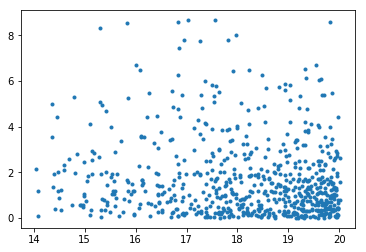

1397.960495300823
0.0126


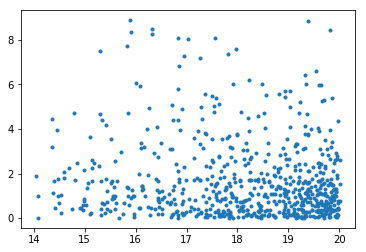

1364.5233172509795
0.0132


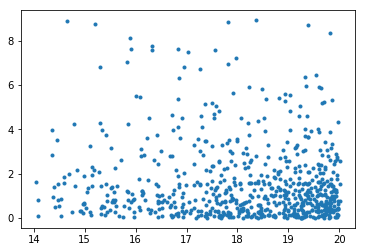

1327.5588156428244
0.0138


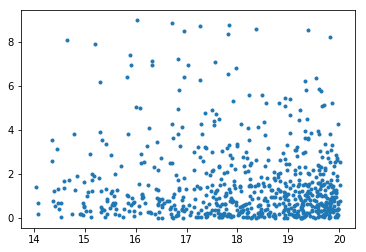

1303.0865654713452
0.015


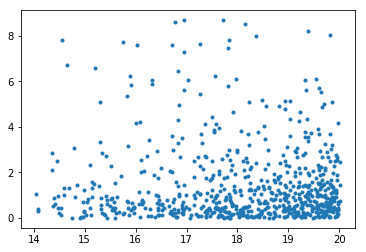

1230.384468369342
0.0162


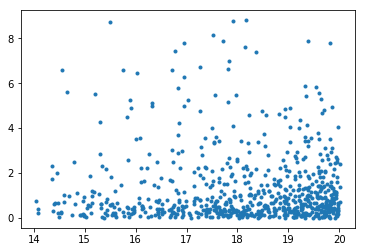

1158.7401423336264
0.0186


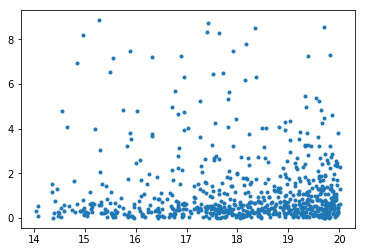

1087.7398622816138
0.0174


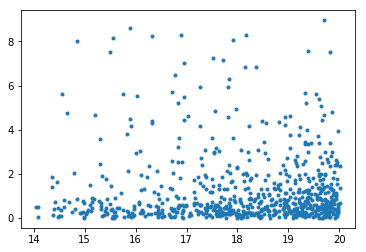

1117.8172874345569
0.015


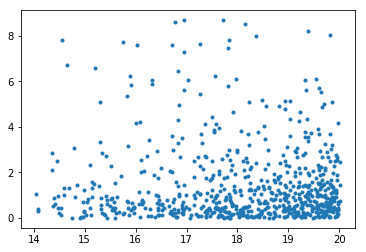

1230.384468369342
0.0168


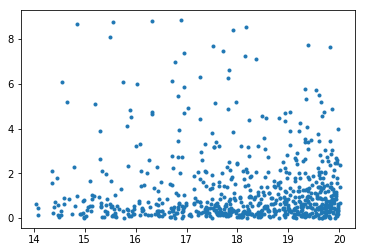

1146.0850744273166
0.0156


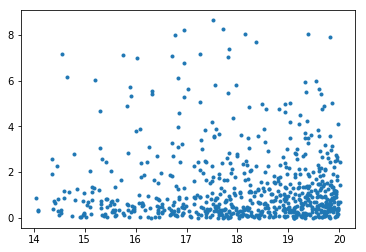

1183.302538803875
0.015


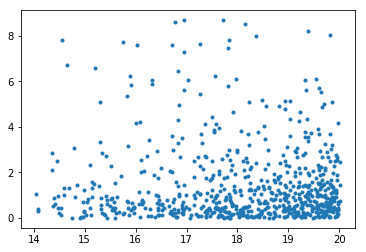

1230.384468369342
0.015


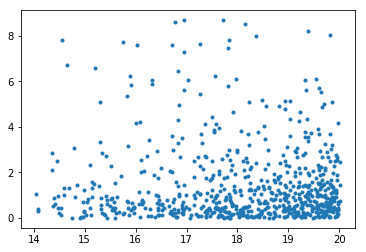

1230.384468369342
0.015899999999999997


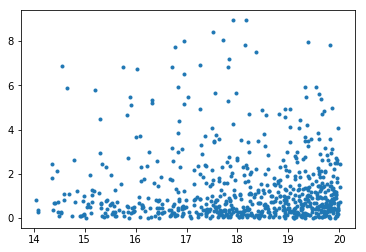

1175.154287462105
0.015899999999999997


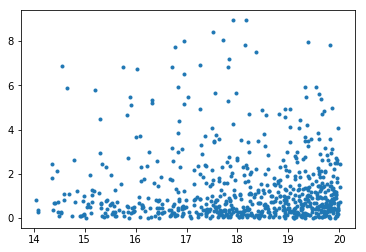

1175.154287462105
0.015300000000000001


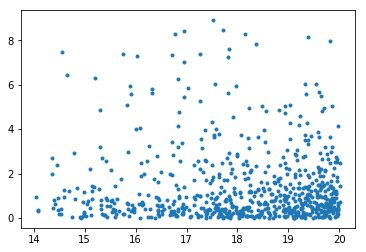

1210.7106921777026
0.01575


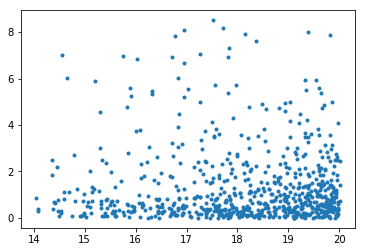

1170.13077715992
0.0159


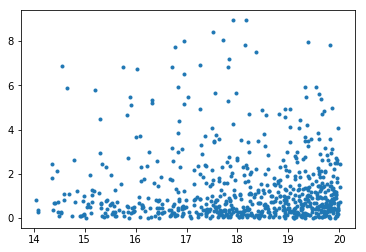

1175.1542874621048
0.015675


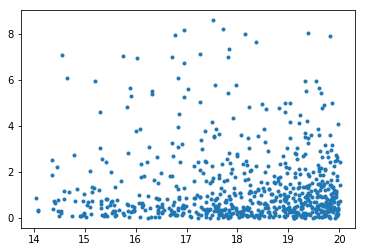

1176.6830548332716
0.015825


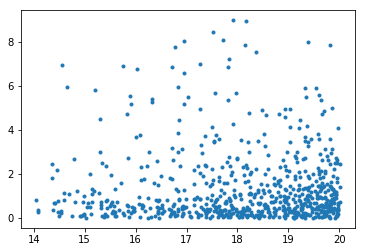

1181.618220261712
0.0157125


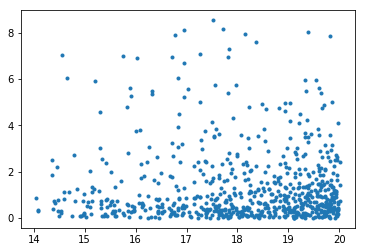

1173.3999622516817
0.0157875


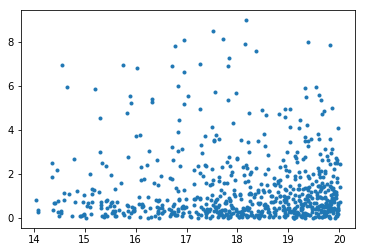

1175.8715542266095
0.015731250000000002


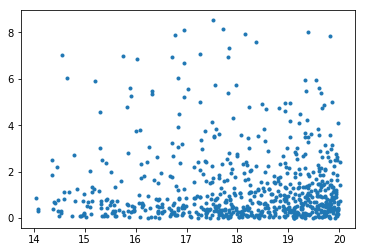

1171.763636932263
0.015768749999999998


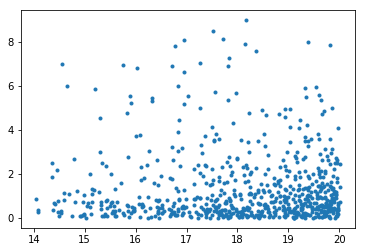

1177.501417268264
0.015740625


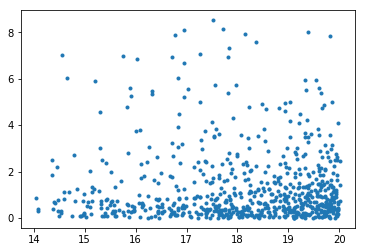

1170.946774557795
0.015759375


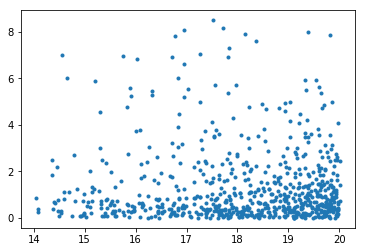

1169.3172026668908
0.015768749999999998


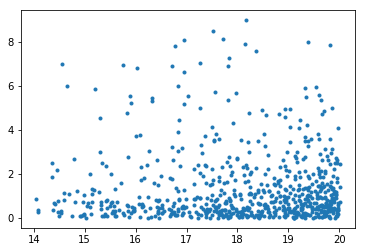

1177.501417268264
0.015768749999999998


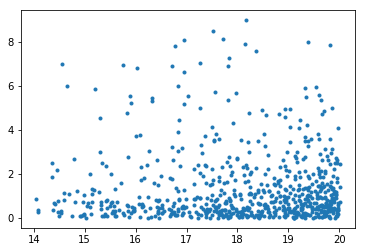

1177.501417268264
0.0157546875


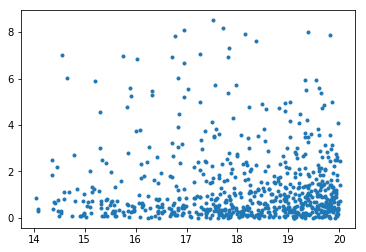

1169.723544173119
0.0157640625


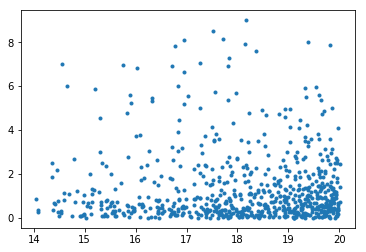

1177.9094191036152
0.015757031249999998


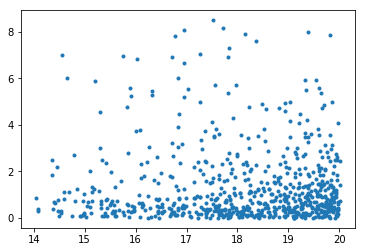

1169.5203465809773
0.01576171875


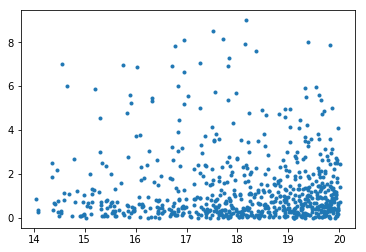

1178.113500551909
0.015758203125


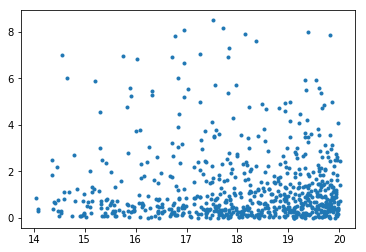

1169.4187679155389
0.015760546875


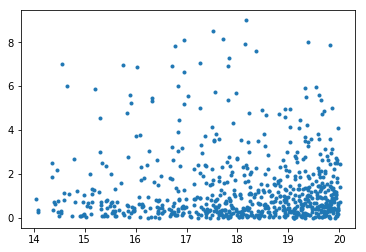

1178.2155614182216
0.0157587890625


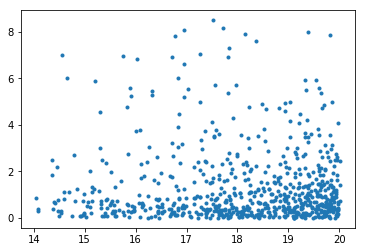

1169.367983614286
0.015759960937499998


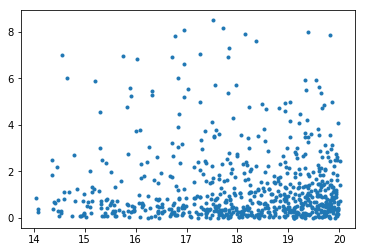

1169.2664250730122
0.015760546874999996


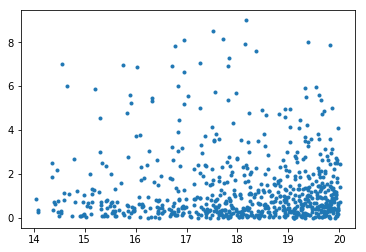

1178.215561418222
0.015760546874999996


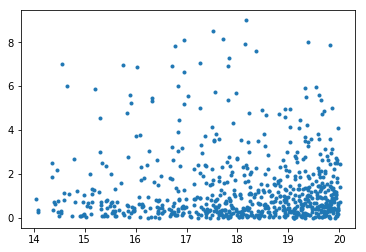

1178.215561418222
0.01575966796875


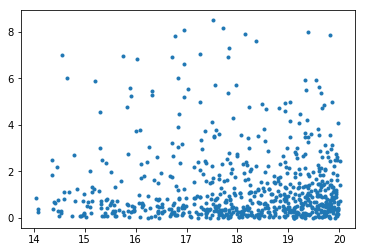

1169.2918134507831


In [9]:
bounds = [(0,0.02)]
res = minimize(Correction_factor,0.012,args=(detec,'g',3),method='Nelder-Mead')

In [10]:
res

 final_simplex: (array([[0.01575996],
       [0.01575967]]), array([9.60820134, 9.60827362]))
           fun: 9.608201336561057
       message: 'Optimization terminated successfully.'
          nfev: 39
           nit: 19
        status: 0
       success: True
             x: array([0.01575996])

In [13]:
print(np.nanmedian(lcg.psfMagErr.iloc[ind]),'orig')
print(np.nanmedian(lcgc.psfMagErr.iloc[indc]),'corr')

0.003665235108812815 orig
0.01254834772347268 corr


In [15]:
print(np.nanstd(lcg.psfMag.iloc[ind]),'orig')
print(np.nanstd(lcgc.psfMag.iloc[indc]),'corr')

0.0037490500114233626 orig
0.013995174996507707 corr


In [33]:
np.nanstd(lcg.psfMag.iloc[ind])

0.0037490500114233626